<a href="https://colab.research.google.com/github/rokywidi/DataMining/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preprocessing

Saving data_pelanggan.csv to data_pelanggan (3).csv
Data Awal:


,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal



Ringkasan Statistik:


,umur,pendapatan,pembelian_tahunan
count,100.000000,100.000000,100.000000
mean,38.790000,74.090000,6.660000
std,11.556008,26.947797,3.929222
min,20.000000,30.000000,1.000000
25%,28.000000,55.250000,3.000000
50%,39.500000,75.000000,6.000000
75%,47.250000,92.500000,9.000000
max,59.000000,119.000000,14.000000



Distribusi Target 'loyalitas':
loyalitas
Tidak Loyal    70
Loyal          30
Name: count, dtype: int64


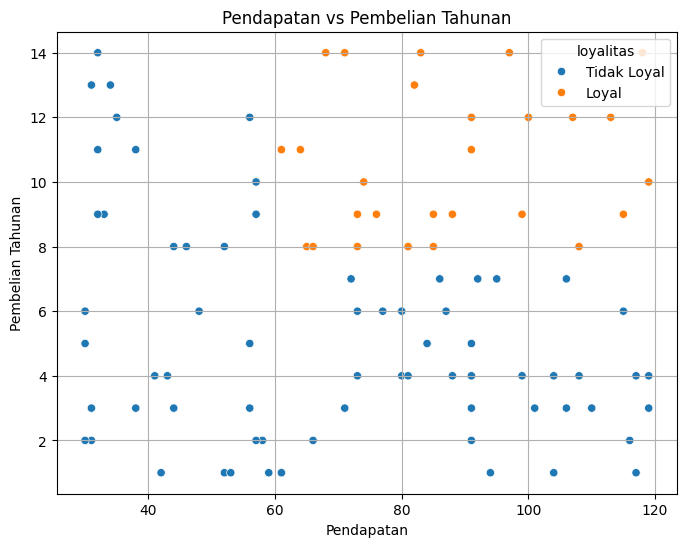

In [9]:
# Bagian 1: Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file CSV
from google.colab import files
uploaded = files.upload()

# Baca data
df = pd.read_csv(next(iter(uploaded)))
print("Data Awal:")
display(df.head())

# Ringkasan statistik
print("\nRingkasan Statistik:")
display(df.describe())

# Cek nilai unik target
print("\nDistribusi Target 'loyalitas':")
print(df['loyalitas'].value_counts())

# Visualisasi hubungan pendapatan dan pembelian_tahunan
plt.figure(figsize=(8,6))
sns.scatterplot(x='pendapatan', y='pembelian_tahunan', hue='loyalitas', data=df)
plt.title('Pendapatan vs Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.grid(True)
plt.show()

# Encode label target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loyalitas'] = le.fit_transform(df['loyalitas'])

# Fitur dan Target
X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas']

# Bagi data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Implementasi Algoritma

In [10]:
# Bagian 2: Implementasi Algoritma
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# a. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree")
print(classification_report(y_test, dt_preds))
print("Akurasi:", accuracy_score(y_test, dt_preds))

# b. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("\nK-Nearest Neighbor (KNN)")
print(classification_report(y_test, knn_preds))
print("Akurasi:", accuracy_score(y_test, knn_preds))


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Akurasi: 1.0

K-Nearest Neighbor (KNN)
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Akurasi: 0.85


3. Analisis Perbandingan

In [11]:
# Bagian 3: Analisis Perbandingan

dt_accuracy = accuracy_score(y_test, dt_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

print("\nAnalisis Perbandingan")
print(f"Akurasi Decision Tree: {dt_accuracy:.2f}")
print(f"Akurasi KNN: {knn_accuracy:.2f}")

if dt_accuracy > knn_accuracy:
    print("Model yang lebih akurat: Decision Tree")
elif knn_accuracy > dt_accuracy:
    print("Model yang lebih akurat: KNN")
else:
    print("Keduanya memiliki akurasi yang sama.")

# Konsistensi klasifikasi
import numpy as np
consistency = np.mean(dt_preds == knn_preds)
print(f"Tingkat konsistensi hasil klasifikasi: {consistency:.2f}")



Analisis Perbandingan
Akurasi Decision Tree: 1.00
Akurasi KNN: 0.85
Model yang lebih akurat: Decision Tree
Tingkat konsistensi hasil klasifikasi: 0.85


**4. Kesimpulan**

Berdasarkan hasil implementasi dan evaluasi dua algoritma klasifikasi, yaitu Decision Tree dan K-Nearest Neighbor (KNN), dapat disimpulkan bahwa Decision Tree menunjukkan akurasi yang lebih tinggi dibandingkan KNN pada dataset pelanggan ini. Hal ini disebabkan oleh kemampuan Decision Tree dalam mengenali pola data secara lebih baik tanpa memerlukan normalisasi fitur. Decision Tree memiliki keunggulan dalam hal interpretasi yang mudah, visualisasi keputusan yang jelas, dan efisiensi pada data tabular, meskipun rentan terhadap overfitting jika tidak dilakukan pruning. Di sisi lain, KNN yang bersifat sederhana dan tidak memerlukan pelatihan, memiliki kelemahan berupa sensitivitas terhadap skala data, outlier, serta menurun performanya pada data berdimensi tinggi atau banyak noise. Perbedaan performa keduanya dipengaruhi oleh distribusi data, skala fitur, dan ukuran dataset, di mana Decision Tree lebih fleksibel terhadap variasi nilai dan tidak tergantung pada skala fitur. Dengan demikian, untuk dataset pelanggan ini, algoritma Decision Tree lebih direkomendasikan karena memberikan hasil klasifikasi yang lebih akurat, stabil, dan mudah dijelaskan secara logis maupun visual.

